# PART 1 - SCENARIO SELECTION

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib

#### All the required libraries were added here. Some of them will be used for pre-processing and others will be used for visualization. There are also importation for model. 

In [154]:
df = pd.read_csv('listings.csv')

#### I have chosen the Chicago AirBnB dataset for the data pipeline. 

## SCENARIO
#### You and a group of friends are considering purchasing a property in Chicago that you can use as an investment. You have heard from other people that they have made a lot of money by renting out either a room or an entire unit (apartment or house). Your friends ask you to analyze data so that they can understand how much you would charge per night based on the type of dwelling you were to purchase.

In [155]:
df.head(10)

id                                               name  host_id  \
0   2384  Hyde Park - Walk to UChicago, 10 min to McCormick     2613   
1   4505  394 Great Reviews. 127 y/o House. 40 yds to tr...     5775   
2   7126                Tiny Studio Apartment 94 Walk Score    17928   
3   9811                      Barbara's Hideaway - Old Town    33004   
4  10610                   3 Comforts of Cooperative Living     2140   
5  10945                              The Biddle House (#1)    33004   
6  12068                 Chicago GOLD COAST 1 Bedroom Condo    40731   
7  12140                           Lincoln Park Guest House    46734   
8  22362  *** Luxury in Chicago! 2BR/ 2Ba / Parking / BB...    85811   
9  24833  Private Apt 1 Block to Fullerton L Red Line - ...   101521   

           host_name  neighbourhood_group    neighbourhood  latitude  \
0            Rebecca                  NaN        Hyde Park  41.78790   
1   Craig & Kathleen                  NaN   South Lawndale  41.85495   
2              Sarah                  NaN        West Town  41.90289   
3        At Home Inn                  NaN     Lincoln Park  41.91769   
4               Lois                  NaN        Hyde Park  41.79612   
5        At Home Inn                  NaN     Lincoln Park  41.91183   
6            Dominic                  NaN  Near North Side  41.90452   
7  Sharon And Robert                  NaN     Lincoln Park  41.92335   
8              Craig                  NaN        West Town  41.89617   
9                Red                  NaN     Lincoln Park  41.92679   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -87.58780     Private room     60               2                178   
1  -87.69696  Entire home/apt    105               2                395   
2  -87.68182  Entire home/apt     60               2                384   
3  -87.63788  Entire home/apt     65               4                 49   
4  -87.59261     Private room     21               1                 44   
5  -87.64000  Entire home/apt    115               4                 19   
6  -87.63320  Entire home/apt     99               5                  9   
7  -87.64951     Private room    289               2                  4   
8  -87.66041  Entire home/apt     99              91                  9   
9  -87.65521  Entire home/apt    112              32                 37   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2019-12-15               2.56                               1   
1  2020-07-14               2.81                               1   
2  2020-03-08               2.81                               1   
3  2019-10-23               0.63                               9   
4  2020-02-14               0.61                               5   
5  2020-08-06               0.24                               9   
6  2019-01-14               0.13                               1   
7  2018-10-17               0.06                               1   
8  2014-10-12               0.11                               2   
9  2018-07-29               0.29                               4   

   availability_365  
0               353  
1               155  
2               321  
3               300  
4               168  
5               325  
6               316  
7               179  
8               365  
9               180

# PART 2 - DATA SPLITTING AND STORING

In [156]:
random_sample = df.sample(n=100, random_state=42)
random_sample.to_csv('random_sample.csv', index=False)
print("Sample with 100 rows saved to 'random_sample.csv'")

Sample with 100 rows saved to 'random_sample.csv'


#### Here, I have selected 100 random rows from the dataset and created a separate csv file for later use. 

In [157]:
random_sample.head(10)

id                                               name    host_id  \
4963  40182247          3 bdrm; free internet in pilsen/southloop  306943744   
6356  45438479                              English Lavender Room  258297883   
4866  39793384  ROWULA HOUSE - WARM AFRICAN HOSPITALITY IN CHI...   13784535   
4022  35942729        Spacious Sedgwick Condo - Steps to Old Town  200416010   
132    1468342                     Quaint Serenity in Bronzeville    4081052   
4591  38870766  Free parking, 2 blocks from train, 2 bedroom a...   59484991   
1242  15257492                                         让你有如同回家的感觉   96810944   
263    3308694        "The Annex II" Huge 1,600 Sq foot Apartment   16707041   
5372  41901706   Loft apt, easy access to many Chicago hot spots!   94999642   
351    4503332                  Near The Loop and McCormick Place   20059524   

                     host_name  neighbourhood_group    neighbourhood  \
4963                       Joe                  NaN  Lower West Side   
6356                   Darkhan                  NaN    Humboldt Park   
4866                      Omar                  NaN    South Chicago   
4022                      Saul                  NaN  Near North Side   
132                    Suzetta                  NaN  Grand Boulevard   
4591                  Jady And                  NaN   South Lawndale   
1242               Lin & Peter                  NaN         Avondale   
263                    Matthew                  NaN   Near West Side   
5372                     Sarah                  NaN    Humboldt Park   
351   (Email hidden by Airbnb)                  NaN    Armour Square   

      latitude  longitude        room_type  price  minimum_nights  \
4963  41.85974  -87.65797  Entire home/apt    200               1   
6356  41.88866  -87.71965     Private room     44               1   
4866  41.73711  -87.54816     Private room     45               1   
4022  41.91054  -87.63743  Entire home/apt    255               3   
132   41.81266  -87.61586     Private room     55               2   
4591  41.85177  -87.70175  Entire home/apt     67               1   
1242  41.93574  -87.73037     Private room     30               1   
263   41.88670  -87.64338  Entire home/apt    299               2   
5372  41.89845  -87.70402  Entire home/apt     99               1   
351   41.85586  -87.63569  Entire home/apt    100               1   

      number_of_reviews last_review  reviews_per_month  \
4963                  1  2020-02-17               0.14   
6356                  0         NaN                NaN   
4866                  1  2020-08-31               1.00   
4022                 11  2020-09-07               1.09   
132                 123  2020-02-16               1.42   
4591                 43  2020-09-12               3.66   
1242                 26  2020-07-04               0.54   
263                  38  2020-02-16               0.78   
5372                  6  2020-09-05               0.83   
351                  86  2020-03-15               1.33   

      calculated_host_listings_count  availability_365  
4963                               8               365  
6356                               3                 1  
4866                               1               357  
4022                               6               342  
132                                1               364  
4591                               1               177  
1242                               3               266  
263                                2               361  
5372                               1                 1  
351                                3                 0

In [158]:
df.shape

(6397, 16)

#### This is the shape before removing the 100 random rows.

In [159]:
df.drop(random_sample.index, inplace=True)
df.shape

(6297, 16)

#### This is the shape after removing the 100 random rows. Now I will save this dataset into the raw schema in the PostGreSQL.

In [160]:
from sqlalchemy import create_engine, text

host = r'127.0.0.1' # denotes that the db in a local installation
db = r'MSDS610' # db we just created
user = r'postgres' # using the postgres user for this demo
pw = r'MSDS610' # this is the password established during installation
port = r'5432' # default port estabalished during install
schema = r'raw' # schema we just created

db_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))
sql="select tables.table_name from information_schema.tables where (table_schema ='"+schema+"')order by 1;"
table_name = r'airbnb_data'
df.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')
table_df = pd.read_sql(sql, db_conn, index_col=None)
table_df

table_name
0   adult_data
1  airbnb_data

In [161]:
sql=r'SELECT * FROM ' + schema + '.' + table_name
df_check = pd.read_sql(sql, db_conn, index_col=None)

In [162]:
df_check.head(10)

id                                               name  host_id  \
0   2384  Hyde Park - Walk to UChicago, 10 min to McCormick     2613   
1   4505  394 Great Reviews. 127 y/o House. 40 yds to tr...     5775   
2   7126                Tiny Studio Apartment 94 Walk Score    17928   
3   9811                      Barbara's Hideaway - Old Town    33004   
4  10610                   3 Comforts of Cooperative Living     2140   
5  10945                              The Biddle House (#1)    33004   
6  12068                 Chicago GOLD COAST 1 Bedroom Condo    40731   
7  12140                           Lincoln Park Guest House    46734   
8  22362  *** Luxury in Chicago! 2BR/ 2Ba / Parking / BB...    85811   
9  24833  Private Apt 1 Block to Fullerton L Red Line - ...   101521   

           host_name neighbourhood_group    neighbourhood  latitude  \
0            Rebecca                None        Hyde Park  41.78790   
1   Craig & Kathleen                None   South Lawndale  41.85495   
2              Sarah                None        West Town  41.90289   
3        At Home Inn                None     Lincoln Park  41.91769   
4               Lois                None        Hyde Park  41.79612   
5        At Home Inn                None     Lincoln Park  41.91183   
6            Dominic                None  Near North Side  41.90452   
7  Sharon And Robert                None     Lincoln Park  41.92335   
8              Craig                None        West Town  41.89617   
9                Red                None     Lincoln Park  41.92679   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -87.58780     Private room     60               2                178   
1  -87.69696  Entire home/apt    105               2                395   
2  -87.68182  Entire home/apt     60               2                384   
3  -87.63788  Entire home/apt     65               4                 49   
4  -87.59261     Private room     21               1                 44   
5  -87.64000  Entire home/apt    115               4                 19   
6  -87.63320  Entire home/apt     99               5                  9   
7  -87.64951     Private room    289               2                  4   
8  -87.66041  Entire home/apt     99              91                  9   
9  -87.65521  Entire home/apt    112              32                 37   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2019-12-15               2.56                               1   
1  2020-07-14               2.81                               1   
2  2020-03-08               2.81                               1   
3  2019-10-23               0.63                               9   
4  2020-02-14               0.61                               5   
5  2020-08-06               0.24                               9   
6  2019-01-14               0.13                               1   
7  2018-10-17               0.06                               1   
8  2014-10-12               0.11                               2   
9  2018-07-29               0.29                               4   

   availability_365  
0               353  
1               155  
2               321  
3               300  
4               168  
5               325  
6               316  
7               179  
8               365  
9               180

#### Here is the screenshot for the airbnb data added to the PostGreSQL.

![Screenshot 2025-03-06 at 19.02.50.png](<attachment:Screenshot 2025-03-06 at 19.02.50.png>)
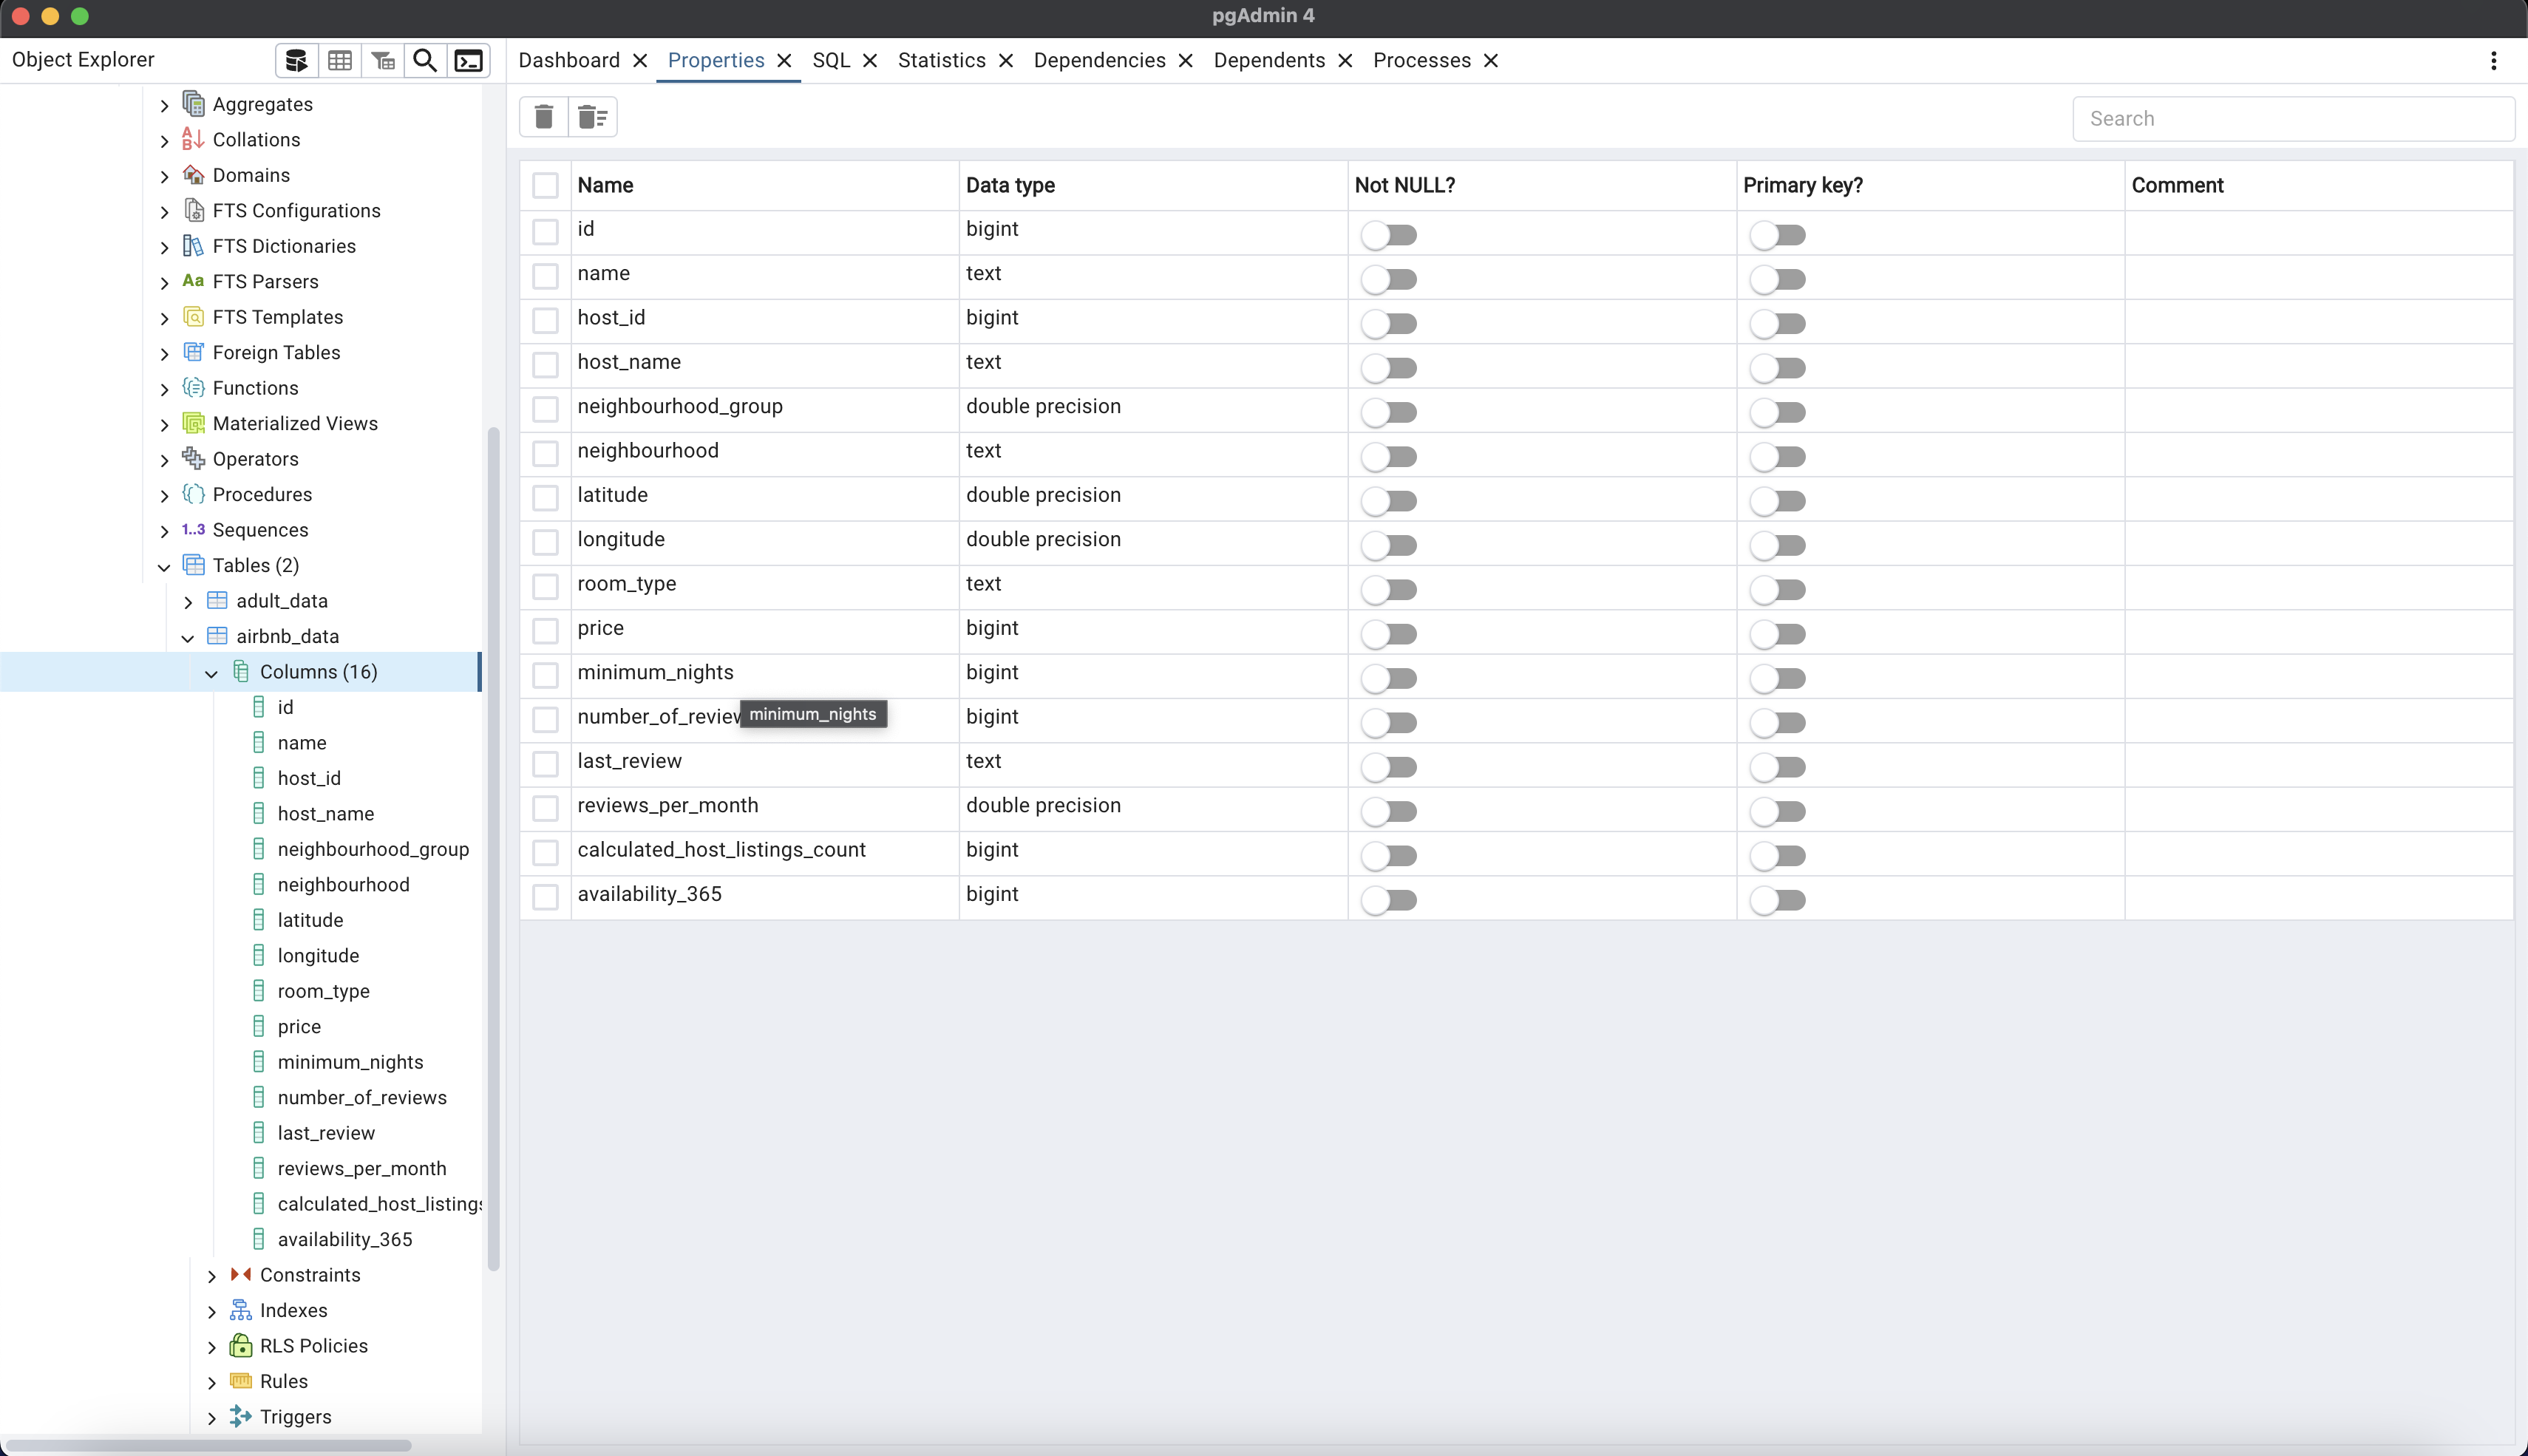

# Part 3 – DATA DEFINITION AND ANALYTICAL QUESTION 

## Data Definition

#### 1. id - This is the identification number for the airBnB. It is currently in the integer datatype.
#### 2. name - These are names of all the airBnb listed in the dataset. The datatype for this field is object. It is not very relevent to the model training in my opinion.
#### 3. host_id - This is the identification number of the host for the airBnB listed in the dataset. The datatype here is int64.
#### 4. host_name - This provides information about the host of the airBnB listed in the dataset. The data format here is object.
#### 5. neighbourhood_group - This category seems to be the grouping of neighbourhoods placed in this row, however it is an empty category with no data.
#### 6. neighbourhood - This category tells us about the neighbourhood in which the airbnb listed in the dataset are located. It is an object datatype.
#### 7. latitude - this category provides information about the latitude coordinates of the airBnB listings. This is float datatype. 
#### 8. longitude - this category provides information about the longitude coordinates of the airBnB listings. This is float datatype. 
#### 9. room_type - This tells us about what type of accomodation is being provided by the airBnB listed in the dataset, for eg. (one room, two bedroom, apartment, entire house) etc. This is an object dataype.
#### 10. price - This provides information about the pricing of the airbnb per night. I think this is in USD. The datatype is integer.
#### 11. minimum_nights - This tells us about how many nights a person needs to stay at a minimum to book the airbnb. This is an integer datatype.
#### 12. number_review - This tells us the total number of reviews that the airbnb has received altogether. This is also an integer datatype. 
#### 13. last_review - This tells us the last date the airbon got a review. This is an object datatype.
#### 14. reviews_per_month - This tells us the number of reviews that the airbnb recieves per month. This is an float datatype.
#### 15. calculated_host_listings_count - This is the number of listings that the host has put up into the airbnb daaset. This is an integer datatype.
#### 16. availability_365 - This tells us about the number of days the airbnb bnb is available for hosting. This is also an integer datatype.

# Type of Data

| CATEGORIES                    | TYPE OF DATA |
| ----------------------------- | ------------ |
| id                            | Discrete     |
| name                          | Nominal      |
| host_id                       | Discrete     |
| host_name                     | Nominal      |
| neighbourhood_group           | (no data)    |
| neighbourhood                 | Discrete     |
| latitude                      | Continuous   |
| longitude                     | Continuous   |
| room_type                     | Nominal      |
| price                         | Discrete     |
| minimum_nights                | Discrete     |
| number_of_reviews             | Discrete     |
| last_review                   | Ordinal      |
| reviews_per_month             | Discrete     |
| calculated_host_listing_group | Discrete     |
| availability_365              | Discrete     |





## ANAYLTICAL QUESTION

### Question - Can the price of an AirBnB be predicted based on the location, room type, and availability?

#### Here, the target category will be the price column of the dataset.

# Part 4 - DATA PREPARATION AND FEATURE SELECTION

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6297 entries, 0 to 6396
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6297 non-null   int64  
 1   name                            6297 non-null   object 
 2   host_id                         6297 non-null   int64  
 3   host_name                       6297 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6297 non-null   object 
 6   latitude                        6297 non-null   float64
 7   longitude                       6297 non-null   float64
 8   room_type                       6297 non-null   object 
 9   price                           6297 non-null   int64  
 10  minimum_nights                  6297 non-null   int64  
 11  number_of_reviews               6297 non-null   int64  
 12  last_review                     5183 no

In [164]:
df.describe()

id       host_id  neighbourhood_group     latitude  \
count  6.297000e+03  6.297000e+03                  0.0  6297.000000   
mean   2.815023e+07  9.859358e+07                  NaN    41.898995   
std    1.286763e+07  9.987667e+07                  NaN     0.059019   
min    2.384000e+03  2.140000e+03                  NaN    41.647360   
25%    1.878634e+07  1.705463e+07                  NaN    41.872460   
50%    2.994174e+07  5.738786e+07                  NaN    41.901960   
75%    3.958548e+07  1.583561e+08                  NaN    41.939800   
max    4.551558e+07  3.679071e+08                  NaN    42.022510   

         longitude         price  minimum_nights  number_of_reviews  \
count  6297.000000   6297.000000     6297.000000        6297.000000   
mean    -87.664027    153.410354        8.059076          42.597745   
std       0.042472    378.917187       22.466861          66.511829   
min     -87.846810      0.000000        1.000000           0.000000   
25%     -87.687320     64.000000        1.000000           2.000000   
50%     -87.660880     99.000000        2.000000          15.000000   
75%     -87.633130    155.000000        3.000000          56.000000   
max     -87.537520  10000.000000      500.000000         632.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  
count        5183.000000                     6297.000000       6297.000000  
mean            1.745559                       13.453867        174.278228  
std             1.748418                       36.872309        138.941854  
min             0.020000                        1.000000          0.000000  
25%             0.430000                        1.000000         35.000000  
50%             1.230000                        2.000000        161.000000  
75%             2.560000                        7.000000        329.000000  
max            32.430000                      205.000000        365.000000

### To build a predictive model from the analytical question I created, I need to select some features that will contribute to answering the question. 

### The features that I think will be important for this predictive model are listed below.

#### 1. neighbourhood
#### 2. latitude
#### 3. longitude
#### 4. room_type
#### 5. price
#### 6. minimum_nights
#### 7. number_of_reviews
#### 8. reviews_per_month
#### 9. calculated_host_listing_count
#### 10. availability_365

### Rest of the features are irrelevant to the predictive model and do not contribute to it. 

## From here, I start the preprocessing.

In [165]:
clean_df = df.copy()

### First I will remove the features that are not relevant to the predictive model to make it easier to pre-process the other features.

In [166]:
drop_columns = ["id", "name", "host_id", "host_name", "neighbourhood_group", "last_review"]
clean_df.drop(columns=drop_columns, inplace=True)

In [167]:
clean_df.isnull().sum()

neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 1114
calculated_host_listings_count       0
availability_365                     0
dtype: int64

### Now there is one features that has missing values. The `reviews_per_month` feature can be filled with 0. I'm assuming that the missing values mean the AirBnB listed is a new one or have has had no activity.

In [168]:
clean_df['reviews_per_month'].fillna(0, inplace=True)

In [169]:
clean_df.isnull().sum()

neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [170]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6297 entries, 0 to 6396
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   6297 non-null   object 
 1   latitude                        6297 non-null   float64
 2   longitude                       6297 non-null   float64
 3   room_type                       6297 non-null   object 
 4   price                           6297 non-null   int64  
 5   minimum_nights                  6297 non-null   int64  
 6   number_of_reviews               6297 non-null   int64  
 7   reviews_per_month               6297 non-null   float64
 8   calculated_host_listings_count  6297 non-null   int64  
 9   availability_365                6297 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 541.1+ KB


#### Now, the dataset is ready for further preprocessing. Here, I am going to convert all the categorical features into numerical features. 

In [171]:
label_encoder = LabelEncoder()
clean_df["neighbourhood"] = label_encoder.fit_transform(clean_df["neighbourhood"])
clean_df["room_type"] = label_encoder.fit_transform(clean_df["room_type"])

#### Now let's check the dataset again.

In [172]:
clean_df.head(5)


neighbourhood  latitude  longitude  room_type  price  minimum_nights  \
0             33  41.78790  -87.58780          2     60               2   
1             64  41.85495  -87.69696          0    105               2   
2             75  41.90289  -87.68182          0     60               2   
3             38  41.91769  -87.63788          0     65               4   
4             33  41.79612  -87.59261          2     21               1   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                178               2.56                               1   
1                395               2.81                               1   
2                384               2.81                               1   
3                 49               0.63                               9   
4                 44               0.61                               5   

   availability_365  
0               353  
1               155  
2               321  
3               300  
4               168

#### I think the `reviews_per_month` feature should be converted to from float to integer, as I think the `reviews_per_month` feature is a count of how many reviews an airBnB recieved in the last month. I have also used the `ceil` function to round the decimals into the next closest integer.

In [173]:
clean_df['reviews_per_month'] = np.ceil(clean_df['reviews_per_month'] * 1000) / 1000
clean_df['reviews_per_month'] = np.ceil(clean_df['reviews_per_month']).astype(int)

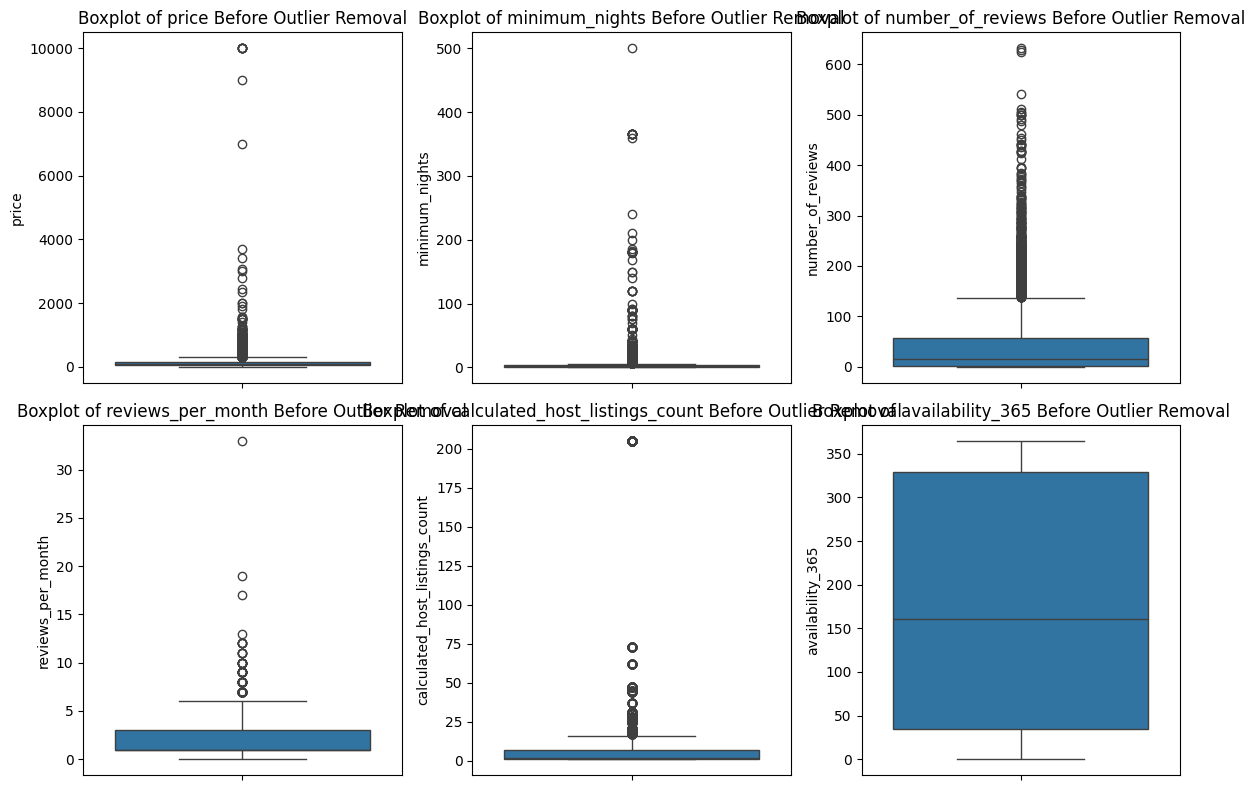

In [174]:
numcols = ["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]

plt.figure(figsize=(12, 8))
for i, column in enumerate(numcols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=clean_df[column])
    plt.title(f"Boxplot of {column} Before Outlier Removal")
plt.tight_layout()
plt.show()

#### I think there is no need for the outliers to be removed as there isn't anything too much extereme going on with the outliers.

### One final look at the dataset before we move forward.

In [175]:
clean_df.head(10)

neighbourhood  latitude  longitude  room_type  price  minimum_nights  \
0             33  41.78790  -87.58780          2     60               2   
1             64  41.85495  -87.69696          0    105               2   
2             75  41.90289  -87.68182          0     60               2   
3             38  41.91769  -87.63788          0     65               4   
4             33  41.79612  -87.59261          2     21               1   
5             38  41.91183  -87.64000          0    115               4   
6             47  41.90452  -87.63320          0     99               5   
7             38  41.92335  -87.64951          2    289               2   
8             75  41.89617  -87.66041          0     99              91   
9             38  41.92679  -87.65521          0    112              32   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                178                  3                               1   
1                395                  3                               1   
2                384                  3                               1   
3                 49                  1                               9   
4                 44                  1                               5   
5                 19                  1                               9   
6                  9                  1                               1   
7                  4                  1                               1   
8                  9                  1                               2   
9                 37                  1                               4   

   availability_365  
0               353  
1               155  
2               321  
3               300  
4               168  
5               325  
6               316  
7               179  
8               365  
9               180

#### Everything looks clean so now I will save the cleaned data and create a reference table for the cleaned data.

In [176]:
clean_airbnb_data = "clean_airbnb_data.csv"
clean_df.to_csv(clean_airbnb_data, index=False)

In [177]:
table_name = r'clean_airbnb_data'
schema = r'cleaned'

clean_df.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

6297

### The screenshot of the cleaned airbnb data being stored in the database is given below.

![Screenshot 2025-03-07 at 15.30.21.png](<attachment:Screenshot 2025-03-07 at 15.30.21.png>)
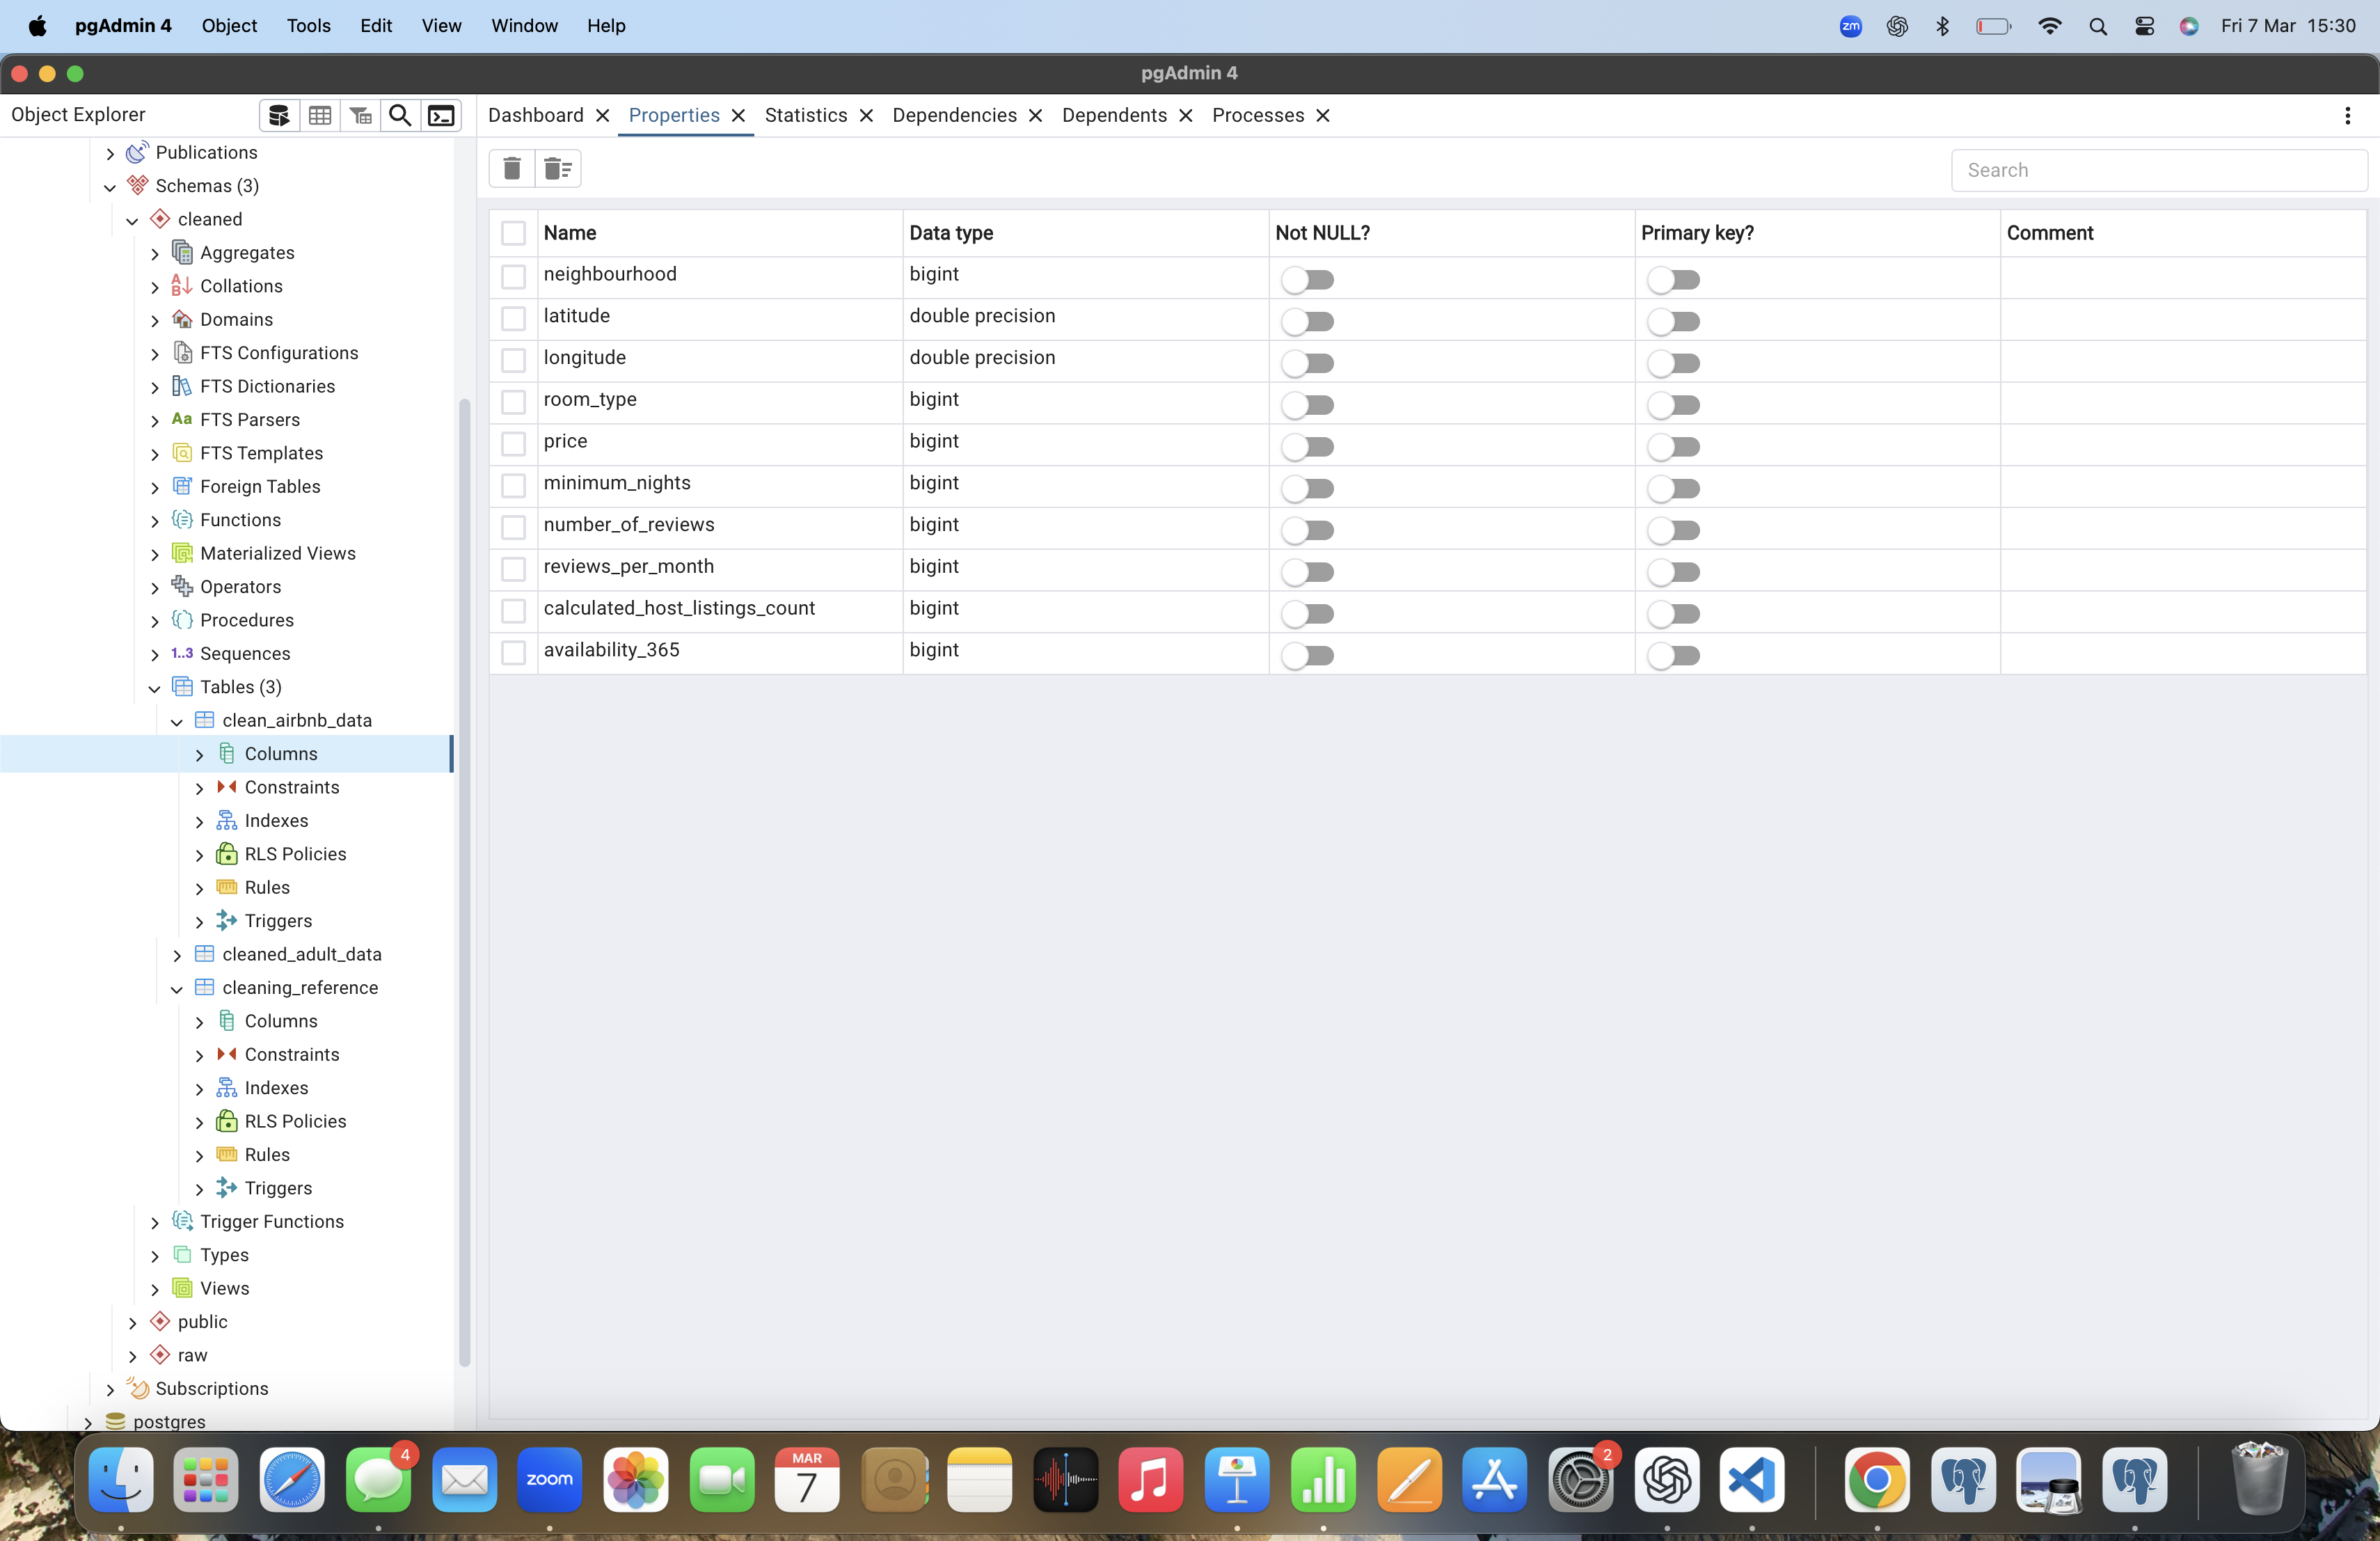

In [178]:
table_name = r'cleaning_reference'
schema = r'cleaned' # schema were the data was loaded last week.

cleaning_reference = pd.read_sql_table(table_name, db_conn, schema)

In [179]:
cleaning_reference.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   field   9 non-null      object
 1   action  9 non-null      object
 2   values  9 non-null      object
dtypes: object(3)
memory usage: 348.0+ bytes


In [180]:
new_rows = [
    {'field': 'id', 'action': 'drop', 'values': 'None'},
    {'field': 'name', 'action': 'drop', 'values': 'None'},
    {'field': 'host_id', 'action': 'drop', 'values': 'None'},
    {'field': 'host_name', 'action': 'drop', 'values': 'None'},
    {'field': 'neighbourhood_group', 'action': 'drop', 'values': 'None'},
    {'field': 'last_review', 'action': 'drop', 'values': 'None'},
    {'field': 'reviews_per_month', 'action': 'fillna', 'values': '0'},
    {'field': 'neighbourhood', 'action': 'label_encoder', 'values': 'Archer Heights, 1'},
    {'field': 'room_type', 'action': 'label_encoder', 'values': 'Entire home/apt, 0'}
    
]

cleaning_reference = pd.concat([cleaning_reference, pd.DataFrame(new_rows)], ignore_index=True)

print(cleaning_reference)


" new_rows = [\n    {'field': 'id', 'action': 'drop', 'values': 'None'},\n    {'field': 'name', 'action': 'drop', 'values': 'None'},\n    {'field': 'host_id', 'action': 'drop', 'values': 'None'},\n    {'field': 'host_name', 'action': 'drop', 'values': 'None'},\n    {'field': 'neighbourhood_group', 'action': 'drop', 'values': 'None'},\n    {'field': 'last_review', 'action': 'drop', 'values': 'None'},\n    {'field': 'reviews_per_month', 'action': 'fillna', 'values': '0'},\n    {'field': 'neighbourhood', 'action': 'label_encoder', 'values': 'Archer Heights, 1'},\n    {'field': 'room_type', 'action': 'label_encoder', 'values': 'Entire home/apt, 0'}\n    \n]\n\ncleaning_reference = pd.concat([cleaning_reference, pd.DataFrame(new_rows)], ignore_index=True)\n\nprint(cleaning_reference)\n"

In [181]:
'''cleaning_reference.head(5)'''

'cleaning_reference.head(5)'

In [182]:
''' cleaning_reference.to_sql(table_name, db_conn, schema=schema, if_exists='append', index=False)'''

" cleaning_reference.to_sql(table_name, db_conn, schema=schema, if_exists='append', index=False)"

In [183]:
''' cleaning_reference.head(5)'''

' cleaning_reference.head(5)'

### The screenshots for the cleaning reference table is below: 

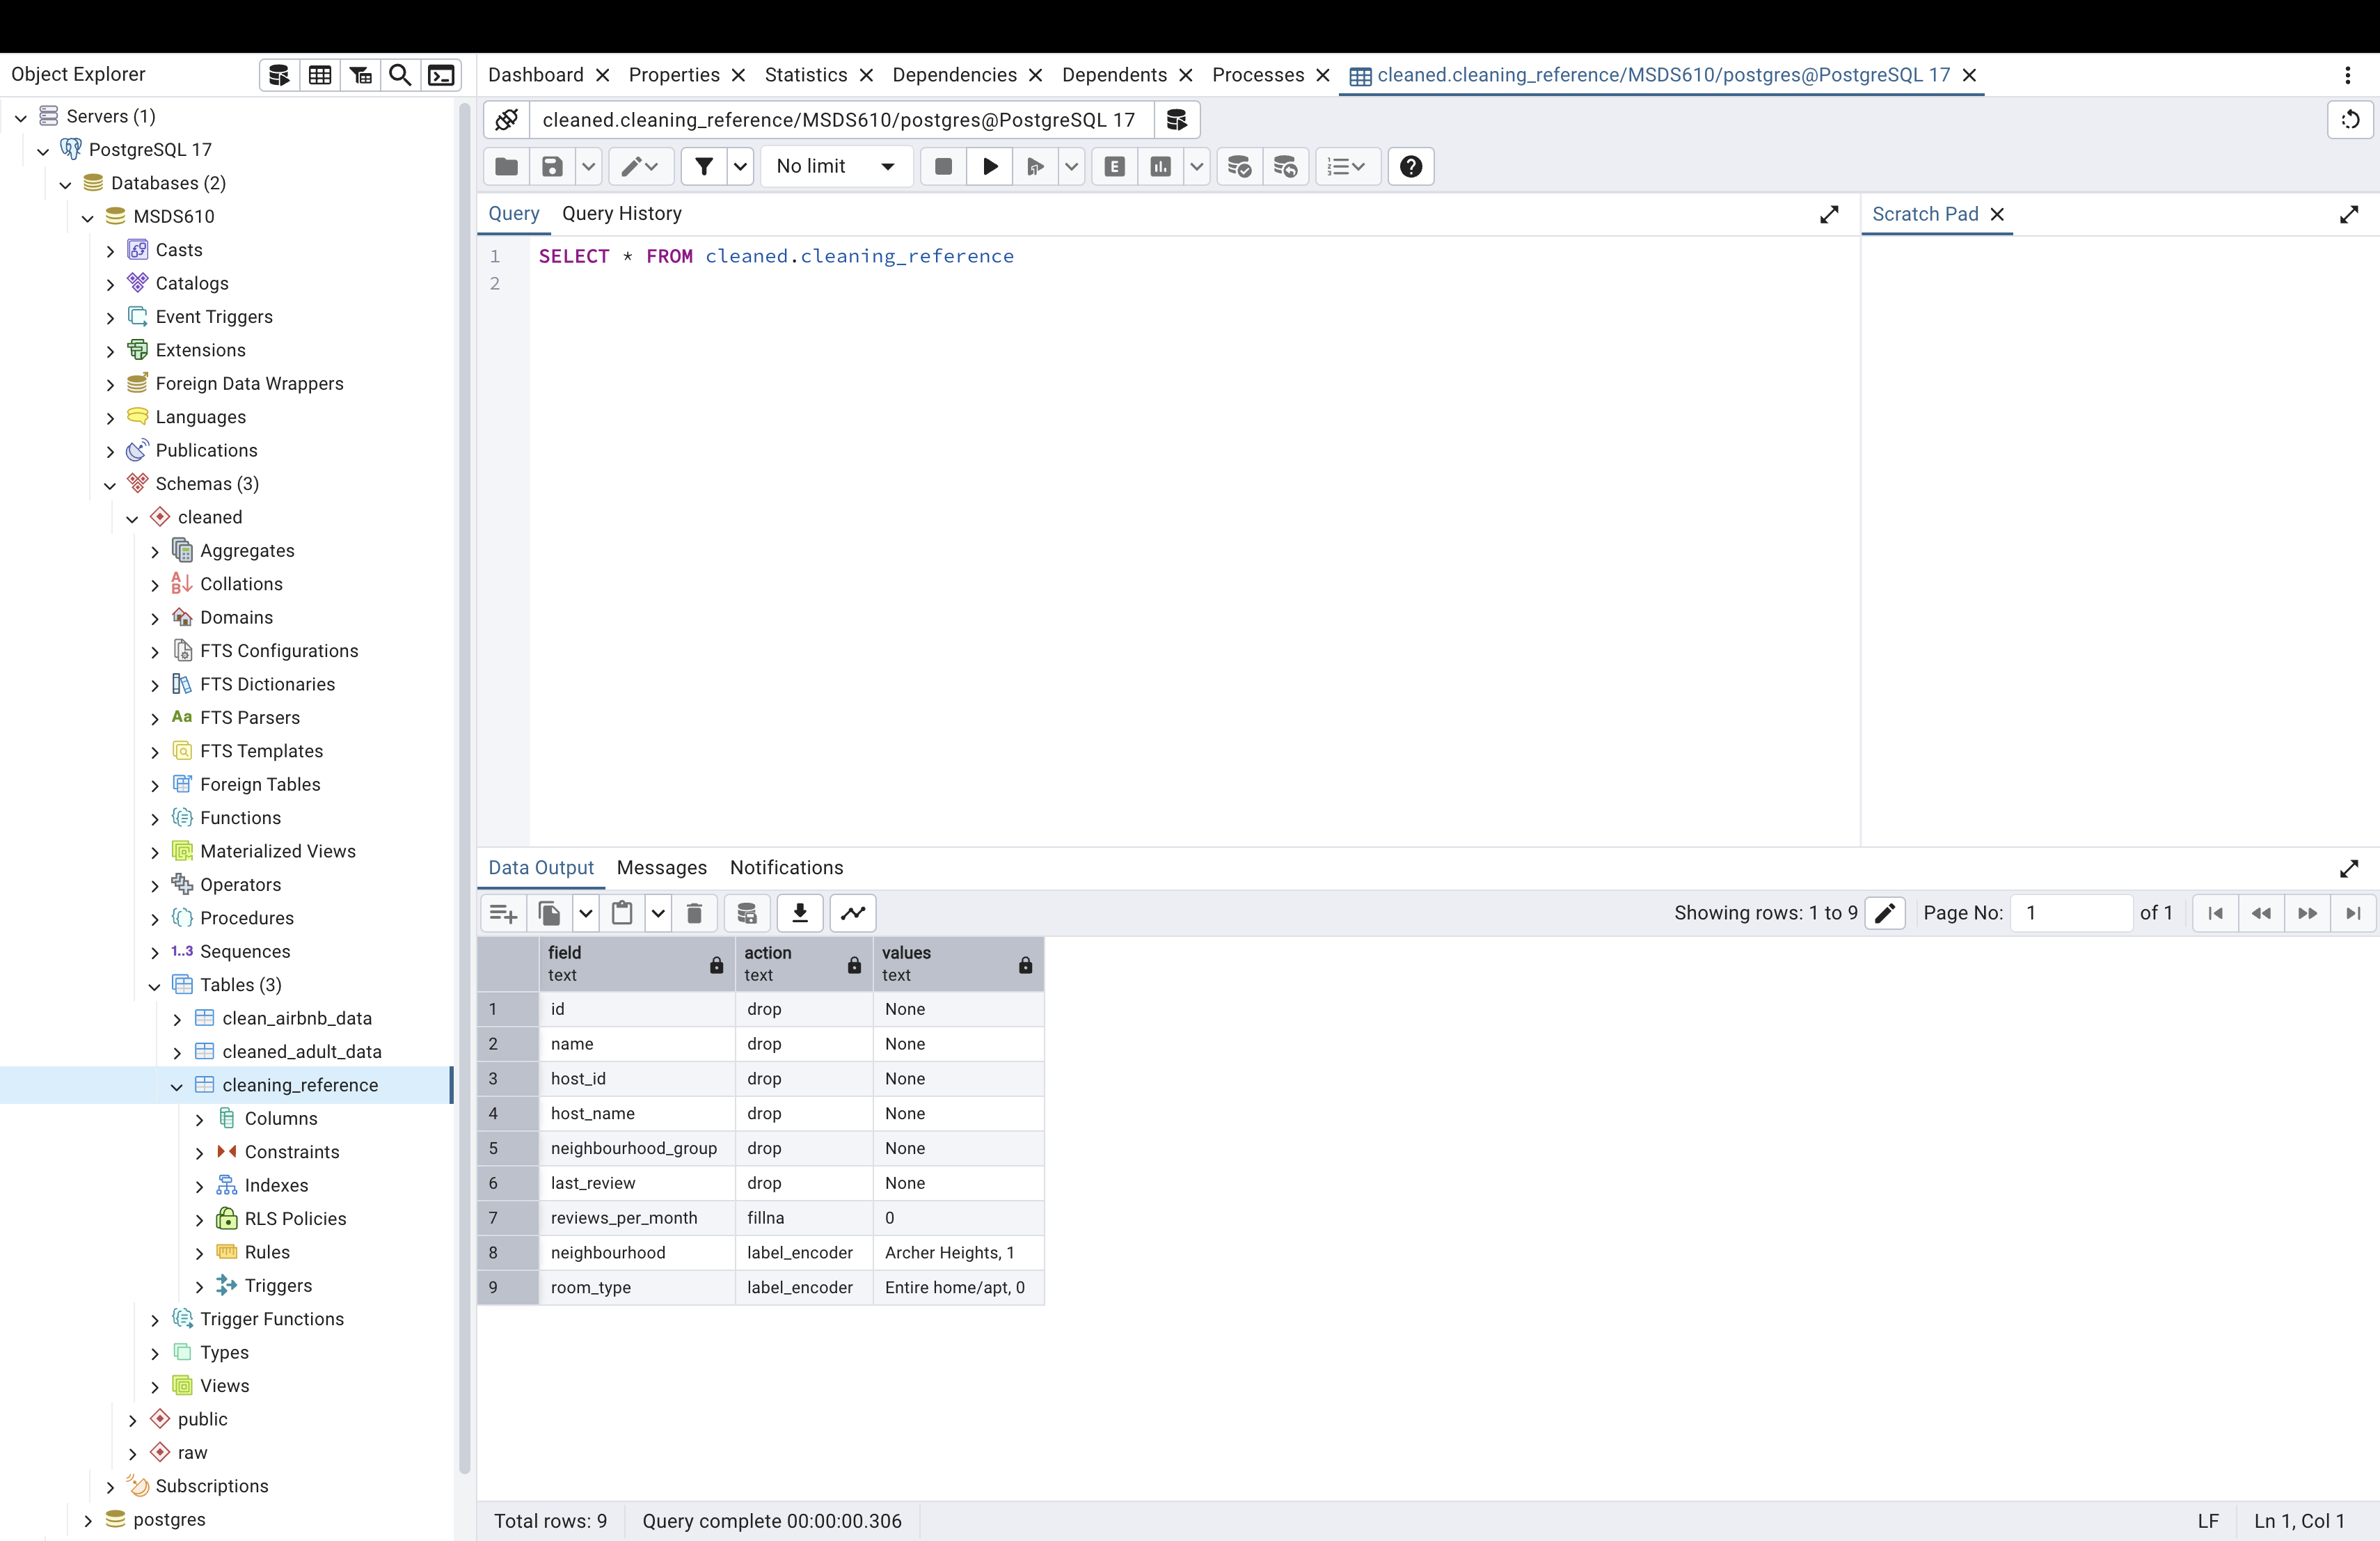

# PART 5 - FEATURE ENGINEERING AND FINAL PREPARATION

#### I am going to add two new features to the model. 
#### The first one being `neighbourhood_density`. This feature will give us information about how many listings are there in a given neighbourhood. A neighbourhood with high density can indicate that there is a competitive market, which can fluctuate the price of the airBnB.
#### The second one will be `room_type_per_neighbourhood`. This feature will tell us about what type of rooms do listings provide in a particular neighbourhood. This is will help us know about what type of listing dominates the neighbourhood. This is will add about 4 more columns into the model.
#### The third one will be `avg_price`. This feature will tell us about the average price of a specific type of room in a specific neighbourhood.


In [184]:
clean_df["neighbourhood_density"] = clean_df.groupby("neighbourhood")["neighbourhood"].transform("count")

In [185]:
clean_df.head(5)

neighbourhood  latitude  longitude  room_type  price  minimum_nights  \
0             33  41.78790  -87.58780          2     60               2   
1             64  41.85495  -87.69696          0    105               2   
2             75  41.90289  -87.68182          0     60               2   
3             38  41.91769  -87.63788          0     65               4   
4             33  41.79612  -87.59261          2     21               1   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                178                  3                               1   
1                395                  3                               1   
2                384                  3                               1   
3                 49                  1                               9   
4                 44                  1                               5   

   availability_365  neighbourhood_density  
0               353                     93  
1               155                     41  
2               321                    714  
3               300                    312  
4               168                     93

In [186]:
room_type_mapping = {0: "Entire home/apt", 1: "Private room", 2: "Shared room", 3: "Hotel room"}
room_type_per_neighbourhood = clean_df.groupby(["neighbourhood", "room_type"]).size().unstack(fill_value=0)
room_type_per_neighbourhood.rename(columns=room_type_mapping, inplace=True)
clean_df = clean_df.merge(room_type_per_neighbourhood, on="neighbourhood", how="left")


In [187]:
clean_df.head(5)

neighbourhood  latitude  longitude  room_type  price  minimum_nights  \
0             33  41.78790  -87.58780          2     60               2   
1             64  41.85495  -87.69696          0    105               2   
2             75  41.90289  -87.68182          0     60               2   
3             38  41.91769  -87.63788          0     65               4   
4             33  41.79612  -87.59261          2     21               1   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                178                  3                               1   
1                395                  3                               1   
2                384                  3                               1   
3                 49                  1                               9   
4                 44                  1                               5   

   availability_365  neighbourhood_density  Entire home/apt  Private room  \
0               353                     93               51             0   
1               155                     41               29             0   
2               321                    714              488            18   
3               300                    312              257             0   
4               168                     93               51             0   

   Shared room  Hotel room  
0           42           0  
1           11           1  
2          204           4  
3           51           4  
4           42           0

In [189]:
avg_price = clean_df.groupby(["neighbourhood", "room_type"])["price"].mean().reset_index()
clean_df = clean_df.merge(avg_price, on=["neighbourhood", "room_type"], how="left", suffixes=("", "_avg"))

In [190]:
clean_df.head(5)

neighbourhood  latitude  longitude  room_type  price  minimum_nights  \
0             33  41.78790  -87.58780          2     60               2   
1             64  41.85495  -87.69696          0    105               2   
2             75  41.90289  -87.68182          0     60               2   
3             38  41.91769  -87.63788          0     65               4   
4             33  41.79612  -87.59261          2     21               1   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                178                  3                               1   
1                395                  3                               1   
2                384                  3                               1   
3                 49                  1                               9   
4                 44                  1                               5   

   availability_365  neighbourhood_density  Entire home/apt  Private room  \
0               353                     93               51             0   
1               155                     41               29             0   
2               321                    714              488            18   
3               300                    312              257             0   
4               168                     93               51             0   

   Shared room  Hotel room   price_avg  
0           42           0   85.714286  
1           11           1   78.965517  
2          204           4  191.133197  
3           51           4  199.661479  
4           42           0   85.714286

In [191]:
prepped_clean_airbnb_data = "preppred_clean_airbnb_data.csv"
clean_df.to_csv(prepped_clean_airbnb_data, index=False)

In [192]:
table_name = r'prepped_clean_airbnb_data'
schema = r'cleaned'

clean_df.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

6297

#### The screen shot of the prepped data being stored into the database.

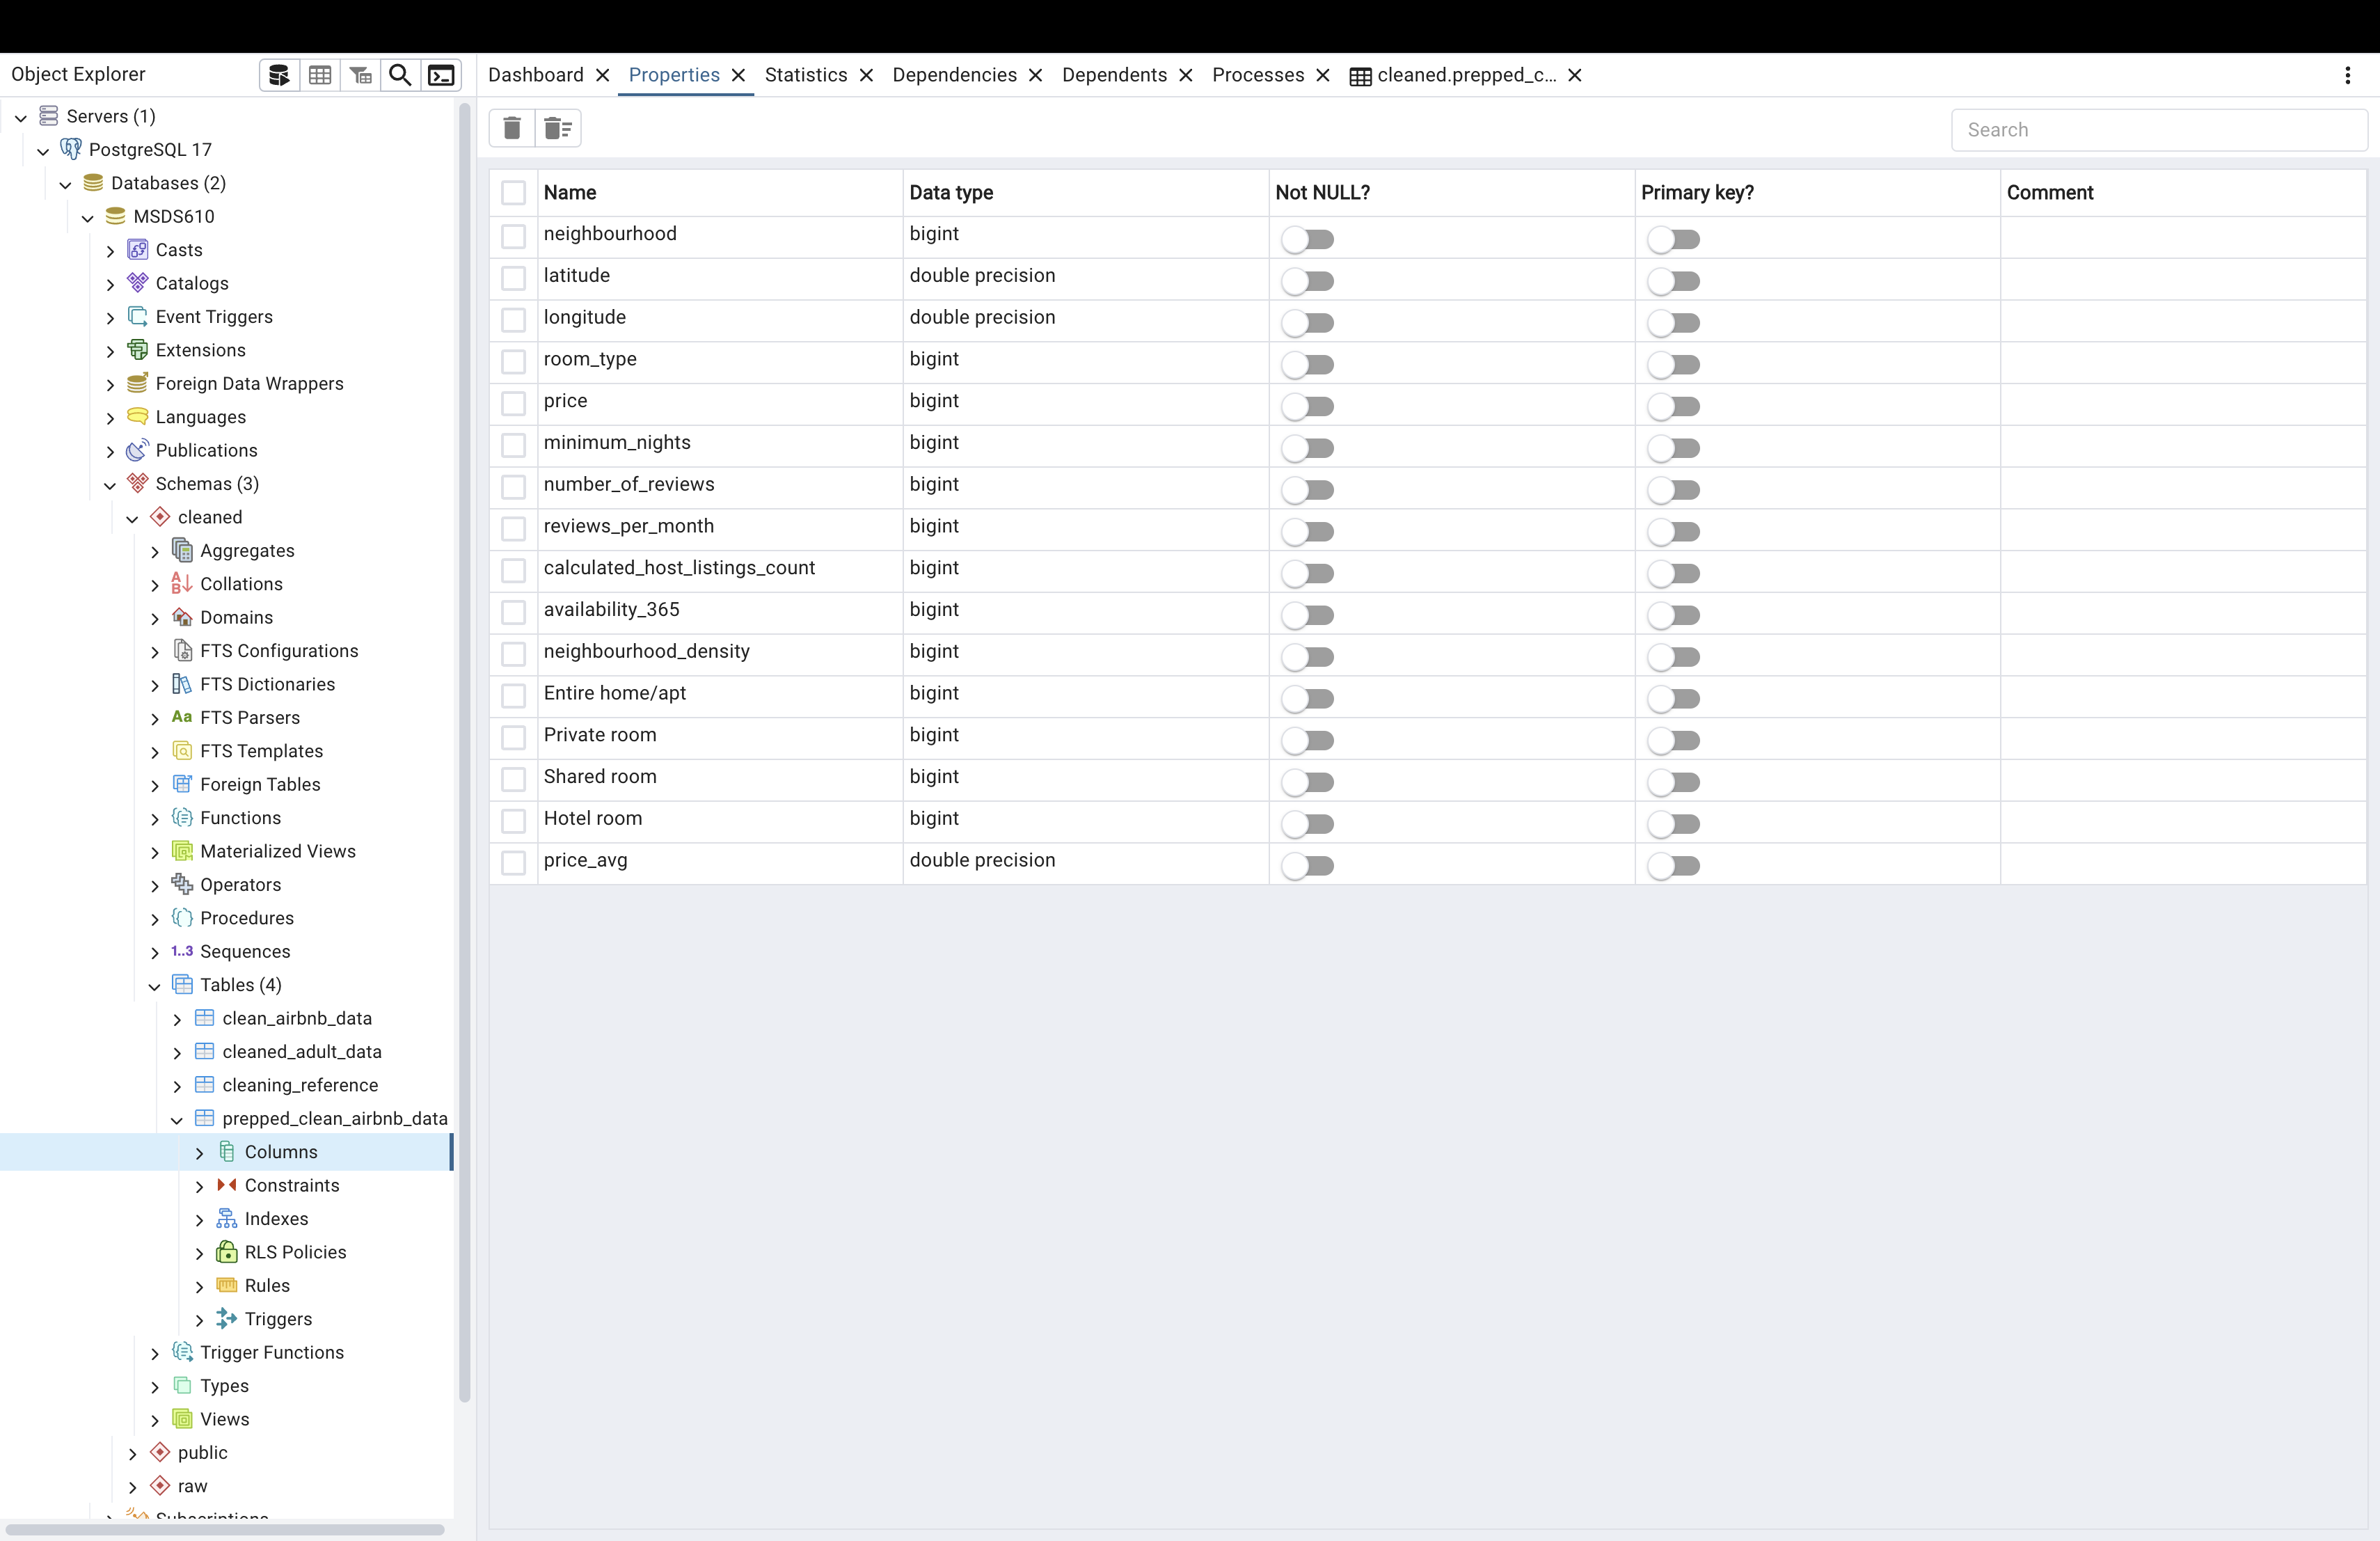

# PART 6 - CONSTRUCTING AN OPTIMAL MODEL

### I have decided to use the `random forest regressor` model here because the pricing pattern can be complex as there are mutliple neighbourhoods with different types of room and availability. It will also provide information about which feature is the most important in this model for price prediction. This model is also better at dealing with outliers, and I have not dealt with the outliers. This model also reduces the risk of overfitting. For the 3-way split, the train set will be 70% of the dataset, it will be used to train the model. the validation set will be 15% of the dataset, it will be used to validate the model  and the rest of the 15% will be for the test set, which will be used for evaluation of the model. The model iteration will be done through many hyperparameters using `GridSearchCV` to optimize the model. The most efficient parameter will be selected on the basis of the validation performance.  

In [195]:
X = clean_df.drop(columns=["price"])
y = clean_df["price"]

In [196]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [197]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [198]:
parameter_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [199]:
grid_search = GridSearchCV(model, parameter_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.5s
[CV] END max_depth=10, min_samples_

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=2)

In [200]:
best_model = grid_search.best_estimator_

In [201]:
y_val_pred = best_model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)


In [202]:
print("Validation Set Performance:")
print(f"MAE: {val_mae}")
print(f"MSE: {val_mse}")
print(f"R² Score: {val_r2}")

Validation Set Performance:
MAE: 79.73344186271127
MSE: 129685.87247823738
R² Score: 0.02272850607617627


In [203]:
y_test_pred = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [204]:
print("Test Set Performance:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"R² Score: {test_r2}")

Test Set Performance:
MAE: 78.75707269311246
MSE: 96660.53378023417
R² Score: 0.06853641729072124



Feature Importances:
                           Feature  Importance
14                       price_avg    0.561626
4                   minimum_nights    0.161648
8                 availability_365    0.062747
1                         latitude    0.041206
7   calculated_host_listings_count    0.038315
3                        room_type    0.035767
2                        longitude    0.028990
5                number_of_reviews    0.022839
6                reviews_per_month    0.013455
0                    neighbourhood    0.009694
12                     Shared room    0.007409
9            neighbourhood_density    0.007256
10                 Entire home/apt    0.004516
13                      Hotel room    0.002359
11                    Private room    0.002173


/var/folders/h9/v742vpc15g33t2vw05cc0jkc0000gn/T/ipykernel_56597/2475698569.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


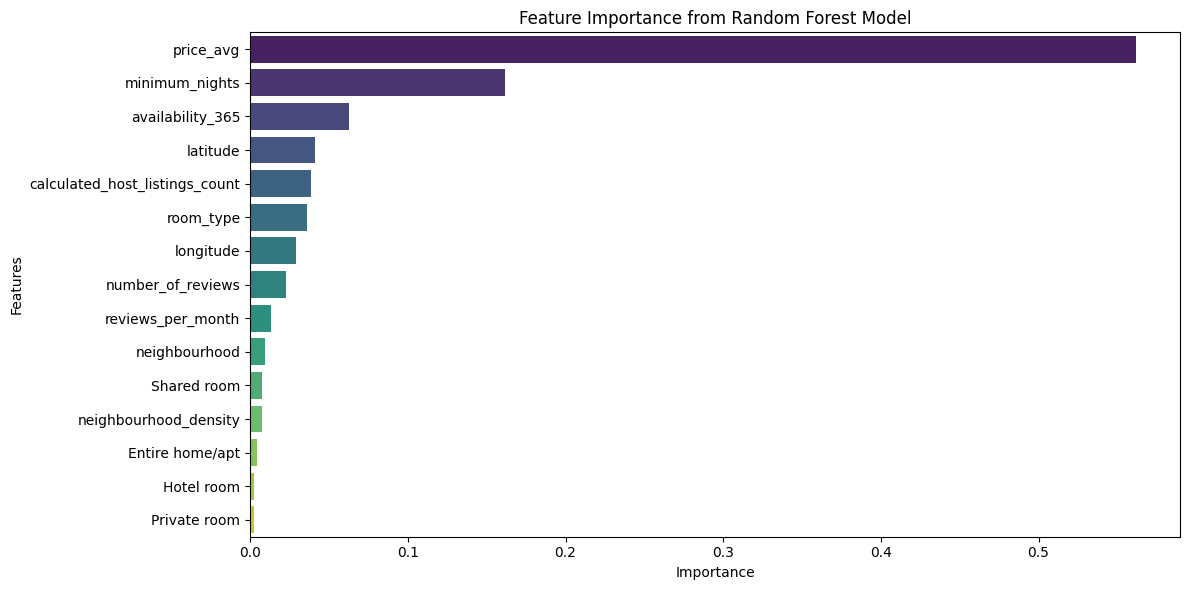

In [208]:


# Feature Importance
feature_importances = best_model.feature_importances_
features = X.columns

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print("\nFeature Importances:")
print(importance_df)

# Plot Feature Importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [205]:
model_path = "best_model.joblib"
joblib.dump(best_model, model_path)
print("Best model saved at:", model_path)

Best model saved at: best_model.joblib
